✅ Weights Loaded


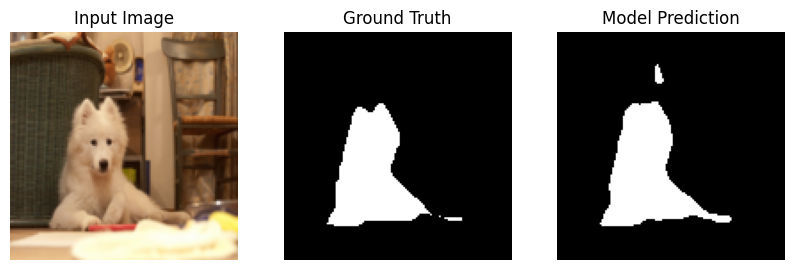

In [2]:
import torch
import matplotlib.pyplot as plt
import sys
import os

# Setup
sys.path.append('../src')
from dataset import PetDataset
from models import UNet

# 1. Load Data
ds = PetDataset("../data/raw/Oxford-IIT-PetDataset", split='val')
img_tensor, mask_tensor = ds[450] # Get first image

# 2. Load Model (Experiment 1)
device = "cuda" if torch.cuda.is_available() else "cpu"
model = UNet(downsample_mode='mp', upsample_mode='tr').to(device)

# Load the weights we just saved
weights_path = "../results/Exp1_MP_Tr_BCE_best.pth"
if os.path.exists(weights_path):
    model.load_state_dict(torch.load(weights_path))
    print("✅ Weights Loaded")
else:
    print("❌ Weights NOT found. Check path.")

# 3. Predict
model.eval()
with torch.no_grad():
    input_batch = img_tensor.unsqueeze(0).to(device) # Add batch dim
    logits = model(input_batch)
    preds = torch.sigmoid(logits) # Convert to 0-1
    preds = (preds > 0.5).float().cpu().numpy()[0][0] # Convert to 0 or 1

# 4. Visualize
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
# PyTorch is (C, H, W), Matplotlib needs (H, W, C)
plt.imshow(img_tensor.permute(1, 2, 0)) 
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(mask_tensor[0], cmap='gray')
plt.title("Ground Truth")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(preds, cmap='gray')
plt.title("Model Prediction")
plt.axis('off')

plt.show()